Number of circles detected: 11
circle 944 720 69
circle 817 615 148
circle 238 624 127
circle 762 494 38
circle 213 489 44
circle 851 449 44
circle 151 388 125
circle 391 298 172
circle 1060 208 70
circle 819 234 125
circle 311 126 65


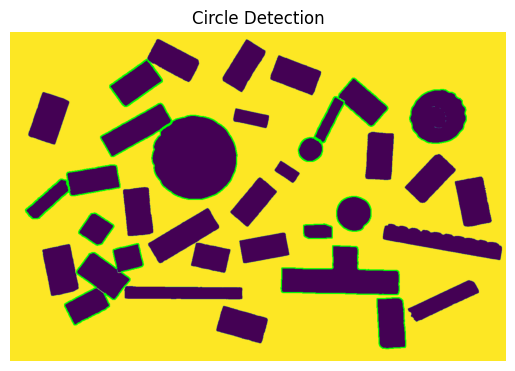

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('6.png', cv2.IMREAD_COLOR)

# 转换图像为灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 使用高斯模糊进行平滑处理
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# 使用Canny边缘检测
edges = cv2.Canny(blurred, 50, 150)

# 寻找轮廓
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 过滤掉非圆形轮廓
circles = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    if len(approx) > 5:  # 考虑圆形的轮廓
        circles.append(contour)
#返回圆形轮廓的数量
print("Number of circles detected:", len(circles))
#返回圆的圆心坐标和半径
for i in circles:
    (x, y), radius = cv2.minEnclosingCircle(i)
    #取整打印
    print('circle', int(x), int(y), int(radius))


# 显示结果图像
result_img = img.copy()
cv2.drawContours(result_img, circles, -1, (0, 255, 0), 2)

# 使用Matplotlib显示图像
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.title('Circle Detection')
plt.axis('off')
plt.show()

In [18]:
#利用HoughCircles函数
#写出检测圆形的函数
def find_circles(img, min_radius, max_radius):
    #用Hough变换检测圆形
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                               param1=1, param2=24, minRadius=min_radius, maxRadius=max_radius)#param1和param2是阈值
    
    #统计检测到的圆形个数
    if circles is not None:
        circles = np.uint16(np.around(circles))#对圆心和半径进行取整
        print("Number of circles detected:", len(circles[0,:]))
    #打印出检测到的圆形的信息
        for i in circles[0,:]:
            print('circle', i[0], i[1], i[2])

    else:
        print("No circles detected.")
    #反转颜色，即从黑变白，白变黑
    img = cv2.bitwise_not(img)
        
    #在原图上绘制圆形，用红色标注边界
    for i in circles[0, :]:
        # 画圆0
        cv2.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 2)
        # 画圆心
        cv2.circle(img, (i[0], i[1]), 2, (0, 255, 0), 3)
    return img



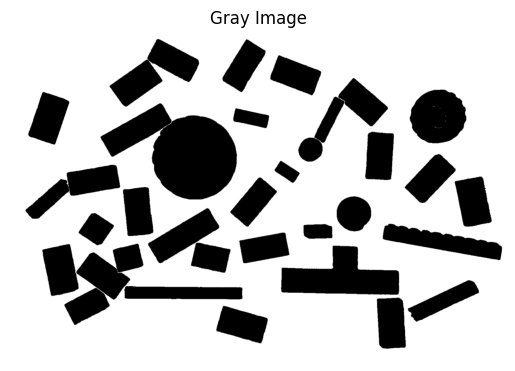

Number of circles detected: 4
circle 458 310 104
circle 1064 212 70
circle 852 450 43
circle 744 292 30


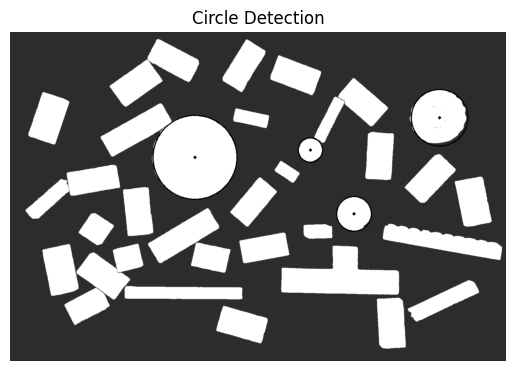

In [19]:
#读取图像
img = cv2.imread('6.png', cv2.IMREAD_COLOR)

# 转换图像为灰度
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#显示灰度图像
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.show()

#找到圆形
result_img = find_circles(gray, 20, 120)

#在原图中画出圆形
# plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
# plt.title('Circle Detection')
# plt.axis('off')
# plt.show()
plt.imshow(result_img, cmap='gray')
plt.title('Circle Detection')
plt.axis('off')
plt.show()

